# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python

Say, we have $d$ features for a given sample point. This $d$-sized feature column vector for a data-sample $i$ is then given by

$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\scriptsize\textrm{test}}}
    \def\powtrain{\pown{\scriptsize\textrm{train}}}
    \def\pred{\st{pred}}
    \def\bM{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bm{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
\bx\powni = 
    \ac{c}{
        x_1\powni \\
        x_2\powni \\ 
        \vdots \\
        x_d\powni
     }  
$$

or typically written transposed to save as

$$
    \bx\powni = \left[  x_1\powni~~ x_2\powni~~ \cdots~~ x_d\powni\right]^T
$$

such that $\bX$ can be constructed of the full set of $n$ samples of these feature vectors

$$
    \bX = 
      \ac{c}{
        (\bx\pown{1})^T \\
        (\bx\pown{2})^T \\
        \vdots \\
        (\bx\pownn)^T
      }
$$

or by explicitly writing out the full data matrix $\bX$ consisting of scalars 

$$
    \bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
        }
$$



but sometimes the notation is a little more fuzzy, leaving out the transpose operator for $\mathbf x$ and in doing so just interpreting the $\mathbf{x}^{(i)}$'s to be row vectors instead of column vectors.

The target column vector, $\mathbf y$, also has the dimension $n$ 

$$
    \by = \ac{c}{
            y\pown{1} \\
            y\pown{2} \\
            \vdots \\
            y\pownn \\
          }
$$

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$

##### Implementation Details

Notice that the ```np.matrix``` class is getting deprecated! So, we use numpy's ```np.array``` as matrix container. Also, __do not__ use the built-in python lists or the numpy matrix subclass.

In [1]:
# Qa

import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

# TODO..create and print the full matrix

X = np.array([[1,2,3],[4,2,1],[3,8,5],[-9,-1,0]])

print(f"Matrix x:\n {X}")



Matrix x:
 [[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Norms, metrics or distances

The $\norm{2}$ Euclidian distance, or norm, for a vector of size $n$ is defined as 

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$

and the distance between two vectors is given by

$$
    \ar{ll}{      
          \mathrm{d}(\bx,\by) &= ||\bx-\by||_2\\
                     &= \left( \sum_{i=1}^n \left| x_{i}-y_{i} \right|^2 \right)^{1/2}
    }
$$ 

This Euclidian norm is sometimes also just denoted as $||\bx||$, leaving out the 2 in the subscript.

The squared $\norm{2}$ for a vector can compactly be expressed via 

$$
    \norm{2}^2: ||\bx||_2^2 = \bx^\top\bx
$$


The $\norm{1}$ 'City-block' norm is given by

$$
    \norm{1}:~~ ||\bx||_1 = \sum_i |x_i|
$$

but $\norm{1}$ is not used as intensive as its more popular $\norm{2}$ cousin. 

Notice that $|x|$ in code means ```fabs(x)```.

#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

First implementation must be a 'low-level'/explicit implementation---using primitive/build-in functions, like ```+```, ```*``` and power ```**``` only! The square-root function can be achieved via power like ```x**0.5```.

Do NOT use any methods from libraries, like ```math.sqrt```, ```math.abs```, ```numpy.linalg.inner```, ```numpy.dot()``` or similar. Yes, using such libraries is an efficient way of building python software, but in this exercise we want to explicitly map the mathematichal formulaes to python code.

Name your functions L1 and L2 respectively, they both take one vector as input argument.

But test your implementation against some built-in functions, say  ```numpy.linalg.norm```

When this works, and passes the tests below, optimize the $\norm{2}$, such that it uses np.numpy's dot operator instead of an explicit sum, call this function ```L2Dot```. This implementation, ```L2Dot```, must be pythonic, i.e. it must not contain explicit for- or while-loops.

In [6]:
# TODO: solve Qb...implement the L1, L2 and L2Dot functions...
def L1(vec):
    if len(vec) == 1:
        raise AssertionError("Must be a vector, not a scalar!")
    
    v0 = 0
    for v in vec:
        if v < 0:
            v = -v
        v0 += v
    
    # return sum(abs(vec))
    return v0

def L2(vec):
    if vec.ndim != 1:
        raise AssertionError("Vector must be 1-dimensional!")
    v0 = 0
    for v in vec:
        v0 += (v**2)

    v0 = v0**0.5
    # return (sum(vec**2))**0.5
    return v0
        
def L2Dot(vec):
    if not isinstance(vec, np.ndarray):
        raise ValueError("Wrong input type, must be numpy.ndarray")
    #return np.linalg.norm
    return np.dot(vec.T,vec)**0.5

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
import math as math
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")


tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## The cost function, $J$

Now, most ML algorithm uses norms or metrics internally when doing minimizations. Details on this will come later, but for now we need to know that an algorithm typically tries to minimize a given performance metric, the loss function, for all the input data, and implicitly tries to minimize the sum of all norms for the 'distances' between some predicted output, $y\st{pred}$ and the true output $y\st{true}$, with the distance between these typically given by the $\norm{2}$ norm

$$   
  \textrm{individual loss:}~~L\powni = \mathrm{d}(y\st{pred}\powni,y\st{true}\powni)
$$ 

with $y\st{pred}\powni$, a scalar value, being the output from the hypothesis function, that maps the input vector $\bx\powni$ to a scalar

$$ 
    y_{pred}\powni = \hat{y}\powni = h(\bx\powni;\btheta)
$$

and the total loss, $J$ will be the sum over all $i$'s

$$
    \ar{rl}{
        J &= \frac{1}{n} \sum_{i=1}^{n} L\powni\\
        &= \frac{1}{n} \sum_{i=1}^{n}\mathrm{d}( h(\bx\powni) , y\powni\st{true})
    }
$$


### Cost function in vector/matrix notation using $\norm{2}$

Remember the data-flow model for supervised learning

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/ml_simple_vector.png" alt="WARNING: could not get image from server." style="width:500px">

Let us now express $J$ in terms of vectors and matrices instead of summing over individual scalars, and let's use $\norm{2}$ as the distance function

$$
    \ar{rl}{
        J(\bX,\by;\btheta) &= \frac{1}{n} \sum_{i=1}^{n} L\powni\\
        &= \frac{1}{n}\sum_{i=1}^{n} (h(\bx\powni) - \by\powni\st{true})^2\\
        &= \frac{1}{n} ||h(\bX) - \by\st{true} ||_2^2\\
        &= \frac{1}{n} ||\by\st{pred} - \by\st{true} ||_2^2\\
     }
$$

with the matrix-vector notation

$$ 
    \by_{pred} = \hat{\by} =  h(\bX;\btheta)
$$

#### Loss or Objective Function using the Mean Squared Error

This formulation is equal to the definition of the _mean-squared-error_, MSE (or indirectly also RMSE), here given in the general formulation for some random variable $Z$ 

$$
    \ar{rl}{
        \textrm{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2 = \frac{1}{n} SS\\
        \textrm{RMSE} &= \sqrt{\textrm{MSE}}\
    }
$$

with sum-of-squares (SS) is given simply by

$$
    \textrm{SS} = \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2\\
$$


So, using the $\norm{2}$ for the distance metric, is equal to saying that we want to minimize $J$ with respect to the MSE

$$
    \ar{rl}{
        J &= \textrm{MSE}(h(\bX), \by\st{true}) \\
          &= \textrm{MSE}(\by\st{pred}~, \by\st{true}) \\
          &= \textrm{MSE}(\hat{\by}, \by\st{true})
     }
$$

Note: when minimizing one can ignore the constant factor $1/n$ and it really does not matter if you minimize MSE or RMSE. Often $J$ is also multiplied by 1/2 to ease notation when trying to differentiate it.

$$
    \ar{rl}{
        J(\bX,\by\st{true};\btheta) &\propto \half ||\by\st{pred} - \by\st{true} ||_2^2 \\
          &\propto \textrm{MSE}
     }
$$

### MSE

Now, let us take a look on how you calculate the MSE.

The MSE uses the $\norm{2}$ norm internally, well, actually $||\cdot||^2_2$ to be precise, and basically just sums, means and roots the individual (scalar) losses (distances), we just saw before. 

And the RMSE is just an MSE with a final square-root call.

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

Call the function RMSE, and evaluate it using the $\bX$ matrix and $\by$ from Qa.

We implement a dummy hypothesis function, that just takes the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

Do not re-implement the $\norm{2}$ for the RMSE function, but call the '''L2''' function you just implemented internally in RMSE.

In [3]:
# TODO: solve Qc...implement your RMSE function here
def RMSE(X,y):
    if not X.shape == y.shape:
        raise ValueError(f"The dimensions of inputs are incorrect.\nX has shape: {X.shape}, while y has shape: {y.shape}")
    
    m = len(X)

    dvar = (1/m)**0.5 * L2(X-y)

    RMSE =  dvar
    return RMSE



# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("expected X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:

r=RMSE(h(X),y)



# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")


RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

The MAE will algorithmic wise be similar to the MSE part from using the $\norm{1}$ instead of the $\norm{2}$ norm.

Again, re-implementation of the$\norm{1}$ is a no-go, call the '''L1''' instead internally i MAE.

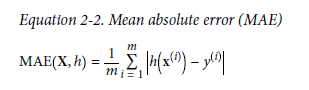

In [4]:
# TODO: solve Qd

def MAE(X,y):
    for i in range(len(X)):
        if isinstance(X[i],np.complex128):
            raise ValueError("Complex number spotted! \nOnly real numbers please!")
        
    if X.shape != y.shape:
        raise ValueError("X and y must have the same shape!")
        
    m = len(X)
    print(type(X))

    MAE = 1/m * L1(X-y)

    return MAE
    


# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")



<class 'numpy.ndarray'>
MAE=3.75, diff=0.0
OK


## Pythonic Code

### Robustness of Code

Data validity checking is an essential part of robust code, and in Python the 'fail-fast' method is used extensively: instead of lingering on trying to get the 'best' out of an erroneous situation, the fail-fast pragma will be very loud about any data inconsistencies at the earliest possible moment.

Hence robust code should include a lot of error checking, say as pre- and post-conditions (part of the design-by-contract programming) when calling a function: when entering the function you check that all parameters are ok (pre-condition), and when leaving you check the return parameter (post-conditions).  

Normally assert-checking or exception-throwing will do the trick just fine, with the exception method being more _pythonic_.

For the norm-function you could, for instance, test your input data to be 'vector' like, i.e. like

```python
    assert x.shape[0]>=0 and x.shape[1]==0
    
    if not x.ndim==1:
        raise some error
```
or similar.

#### Qe Robust Code 

Add error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

Also add error checking to all you previously tested L2() and L1() functions, and re-run all your tests.

In [5]:
# TODO: solve Qe...you need to modify your python cells above

# All functions have been modified to some degree

### Qf Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

### Answer:

Given the design matrix X at the beginning, I/we learned that it was important to fully understand the nomenclature behind how it is designed. Meaning that a row vector is "disguised" as a column vector in the design matrix. We had trouble in jthe beginning, thinking that we actually has to transpose the x(1), x(2)... and ended with a 3x4 matrix, instead of the correct 4x3 matrix.

The first execise was good at testing how to write simple funcitons in "pure" math programming language, but I (Morten) at least decided to use the sum and abs functionality, instead of looping through values. There are outcommented code pieces that show the for loop functionality.

The MSE/RMSE function gave us a good understanding of what it means, when we want to reduce the loss function, since relating it to linear algebra in terms of relating it to minimizing a distance makes great sense. I cant say that we feel as if we grasp the concept fully, but it makes more and more sense.

Comparing the MAE and RMSE it seems that the RMSE is less robust than MAE, since its value is more influenced to squares and roots.

The errorhandling exercise was fine, since it gave a better understanding of the functions, making sure that the inputs correspond to what we want the function to do. For example, we got to the exercise with the incorrect 3x4 design matrix, which the function used just fine, but gave an incorrect result. But when raising the check for equal dimensionality between h(X) and y, it became clear that the design matrix was incorrect.

All in all, good exercises, though the errorhandling was a bit tedious (but good to learn and use in the future nonetheless).

REVISIONS||
:- | :- |
2018-12-18| CEF, initial.                  
2019-01-31| CEF, spell checked and update. 
2019-02-04| CEF, changed d1/d2 in Qb to L1/L2. Fixe rev date error.
2019-02-04| CEF, changed headline.
2019-02-04| CEF, changed (.) in dist(x,y) to use pipes instead.
2019-02-04| CEF, updated supervised learning fig, and changed , to ; for thetas, and change = to propto.
2019-02-05| CEF, post lesson update, minor changes, added fabs around two test vectors.
2019-02-07| CEF, updated def section. 
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2019-09-05| CEF, fixed defect in print string and commented on fabs.
2020-01-30| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-24| CEF, elaborated on MAE and RMSE, emphasized not to use np functionality in L1 and L2.
2020-09-03| CEF, E20 ITMAL update, updated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2021-01-12| CEF, F21 ITMAL update, moved revision table.
2021-02-09| CEF, elaborated on test-vectors. Changed order of Design Matrix descriptions.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2022-02-25| CEF, removed inner product equations.
2022-08-30| CEF, updated to v1 changes.
2023-02-07| CEF, minor update for d.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.